In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline



Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

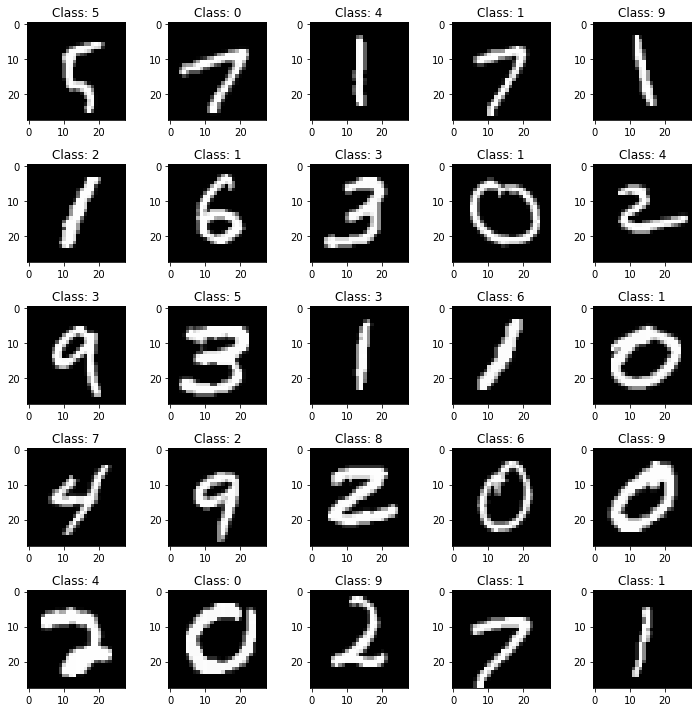

In [0]:
plt.figure(figsize=(10, 10)) #here there is a visualisation of our test set
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx+100], cmap='gray')
    plt.title('Class: {}'.format(y_train[idx]))
    
plt.tight_layout()

In [0]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape #we get the 4 dimensions, i.e. number of photos, their sizes and number of chanells

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
(X_train / 255)[100] #here we normalize our values to be in the range of 0....1 instead of 0...255

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [0]:
X_test.max()

1.0

In [0]:
to_categorical(y_train, 10) #how do the to_categorical function works

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
if len(y_train.shape) == 1:  # now we want to get something like this ones 5 <= [0,0,0,0,0,1,0,0,0,0]
    num_classes = len(set(y_train))                                     #  0 <= [1,0,0,0,0,0,0,0,0,0]
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3)),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

In [0]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=1,
    validation_data=(X_test, y_test)    
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 49s 817us/step - loss: 0.1642 - accuracy: 0.9513 - val_loss: 0.0513 - val_accuracy: 0.9832


#Testing


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [0]:
score

[0.051348093358939514, 0.9832000136375427]